<a href="https://colab.research.google.com/github/esarvesh11/Industrial-Smoke-Detection-using-YOLO-Algorithm-Computer-Vision/blob/main/Smoke_Detection_YOLO_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
import os
from IPython.display import Image
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6syEHfL890JZVCu6qajU")
project = rf.workspace("vjti-tu8hq").project("csir-7")
dataset = project.version(3).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to csir-7-1 in yolov8:: 100%|██████████| 1384/1384 [00:00<00:00, 3131.53it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=55 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 243MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/csir-7-1/data.yaml, epochs=55, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1710.jpg
confusion_matrix.png				   train_batch1711.jpg
events.out.tfevents.1688972676.0c44c7a976f3.785.0  train_batch1712.jpg
F1_curve.png					   train_batch1.jpg
P_curve.png					   train_batch2.jpg
PR_curve.png					   val_batch0_labels.jpg
R_curve.png					   val_batch0_pred.jpg
results.csv					   val_batch1_labels.jpg
results.png					   val_batch1_pred.jpg
train_batch0.jpg				   weights


/content


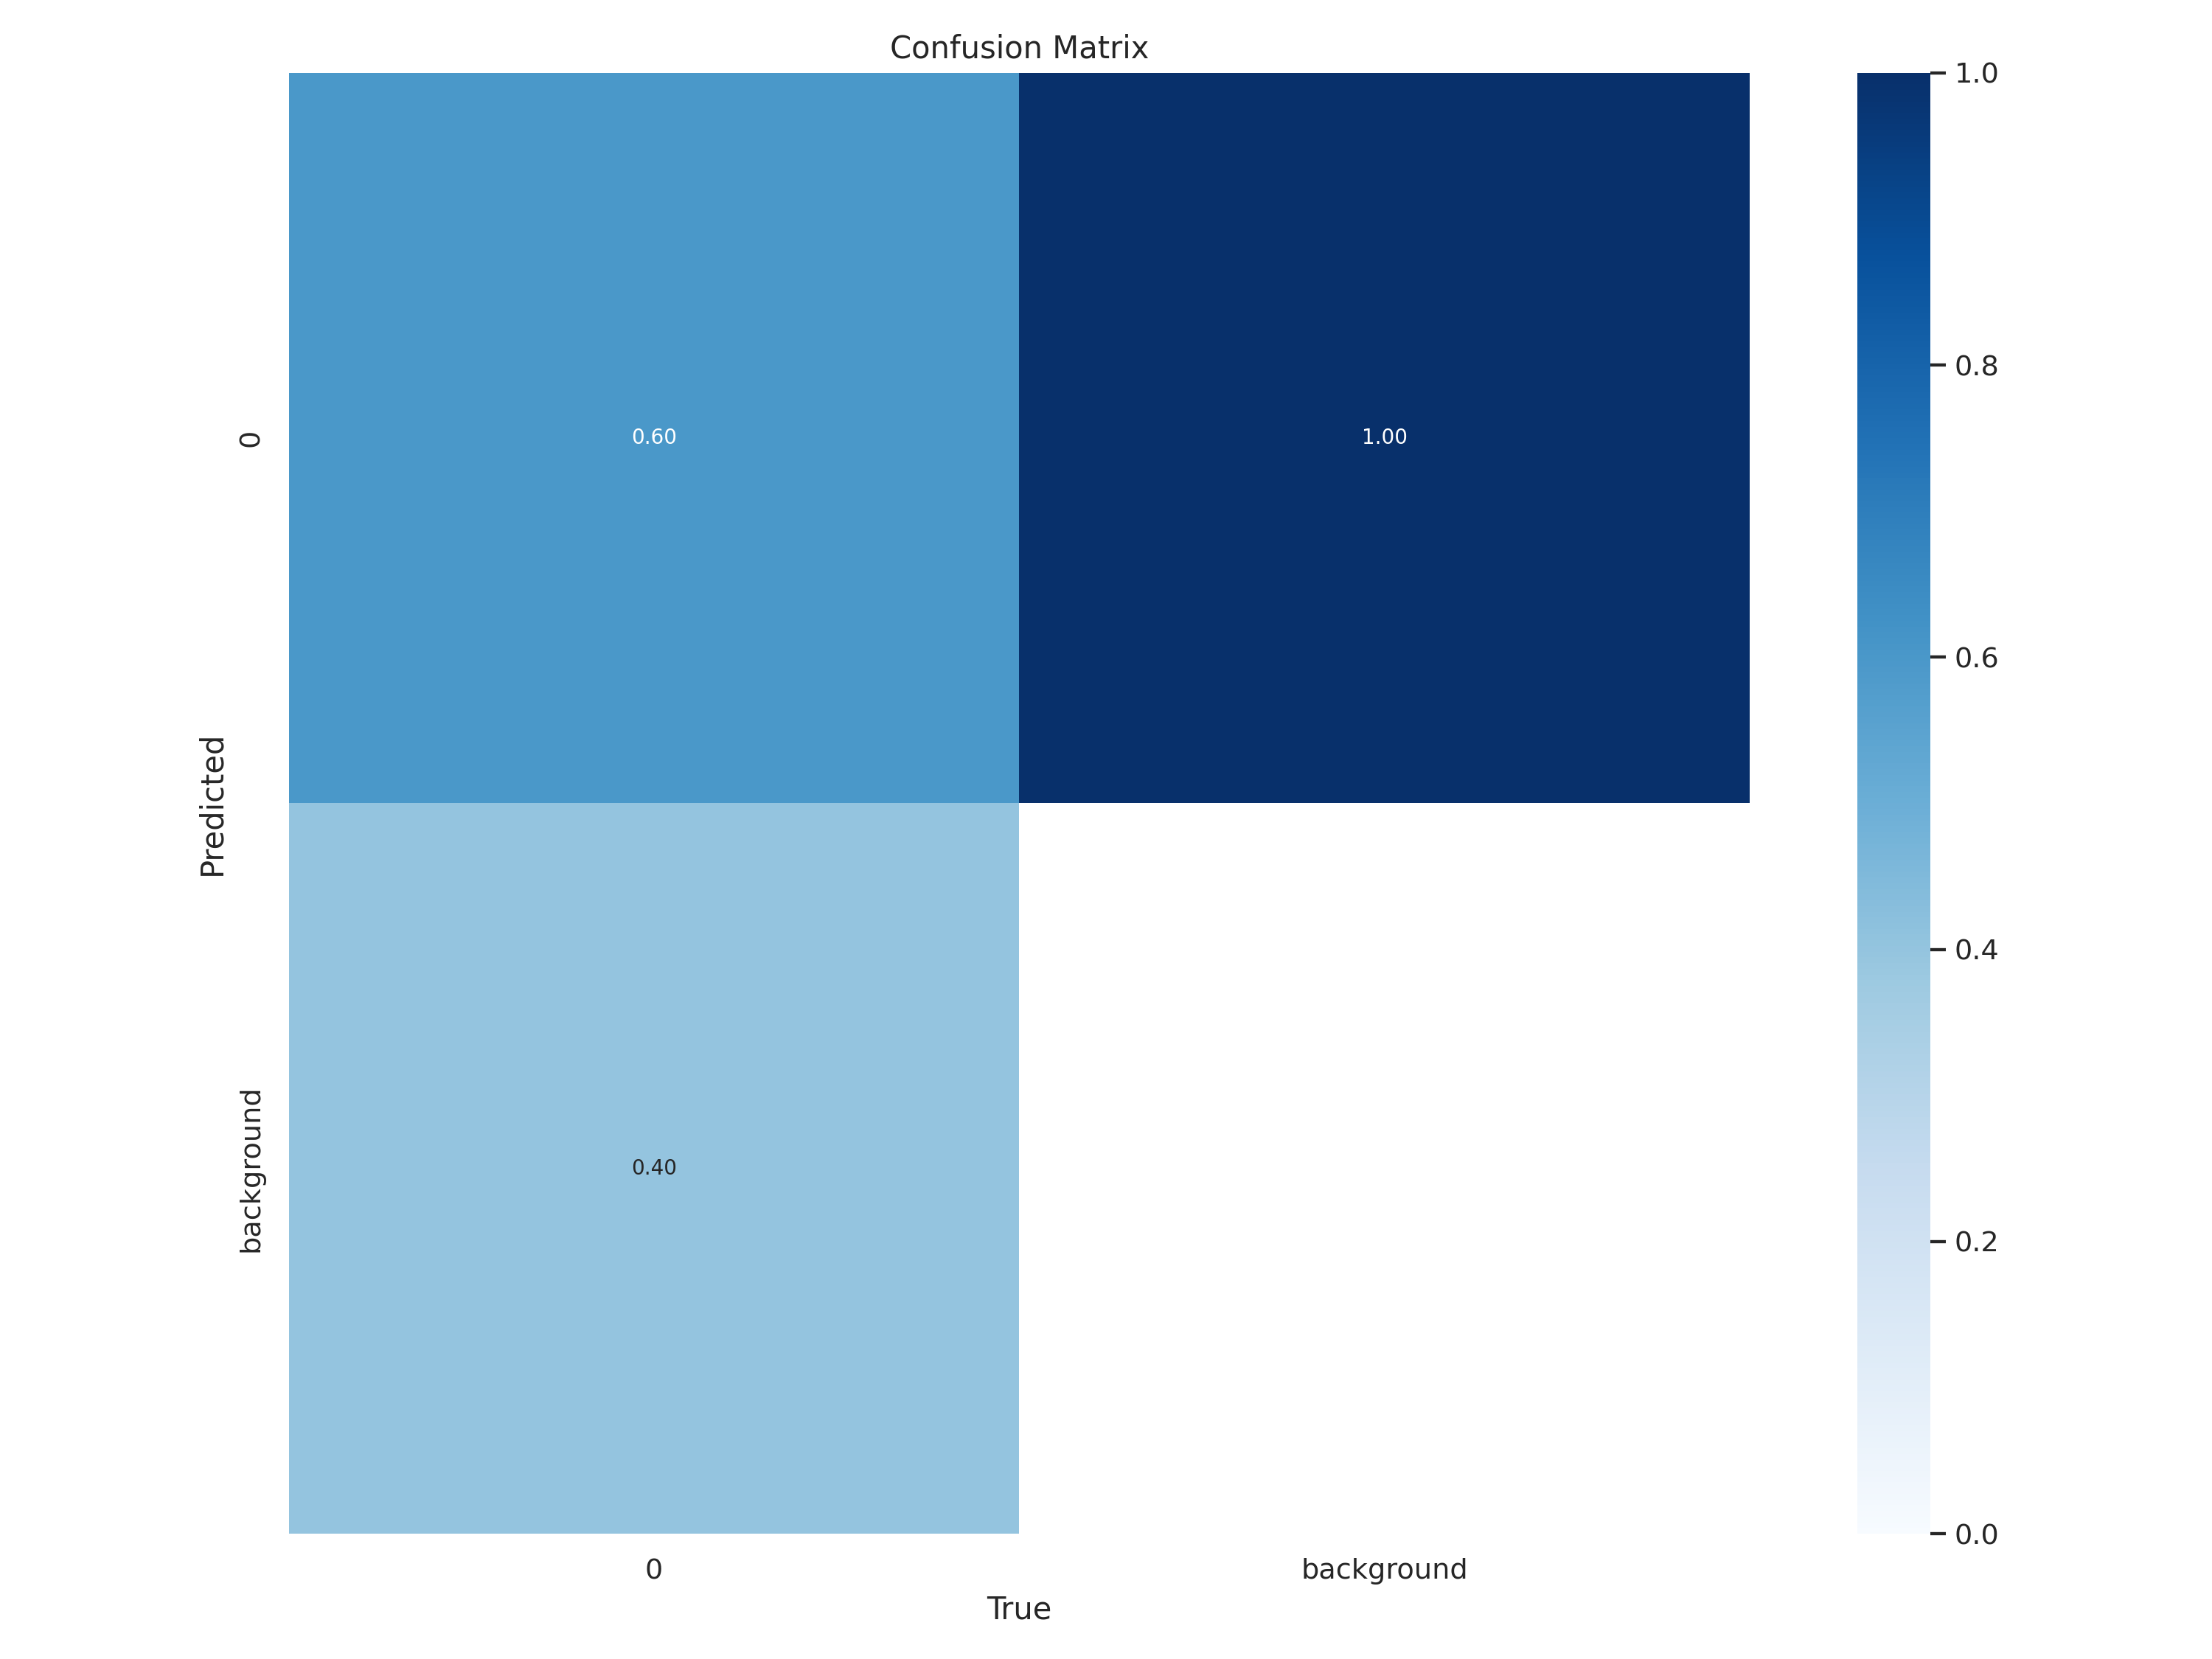

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


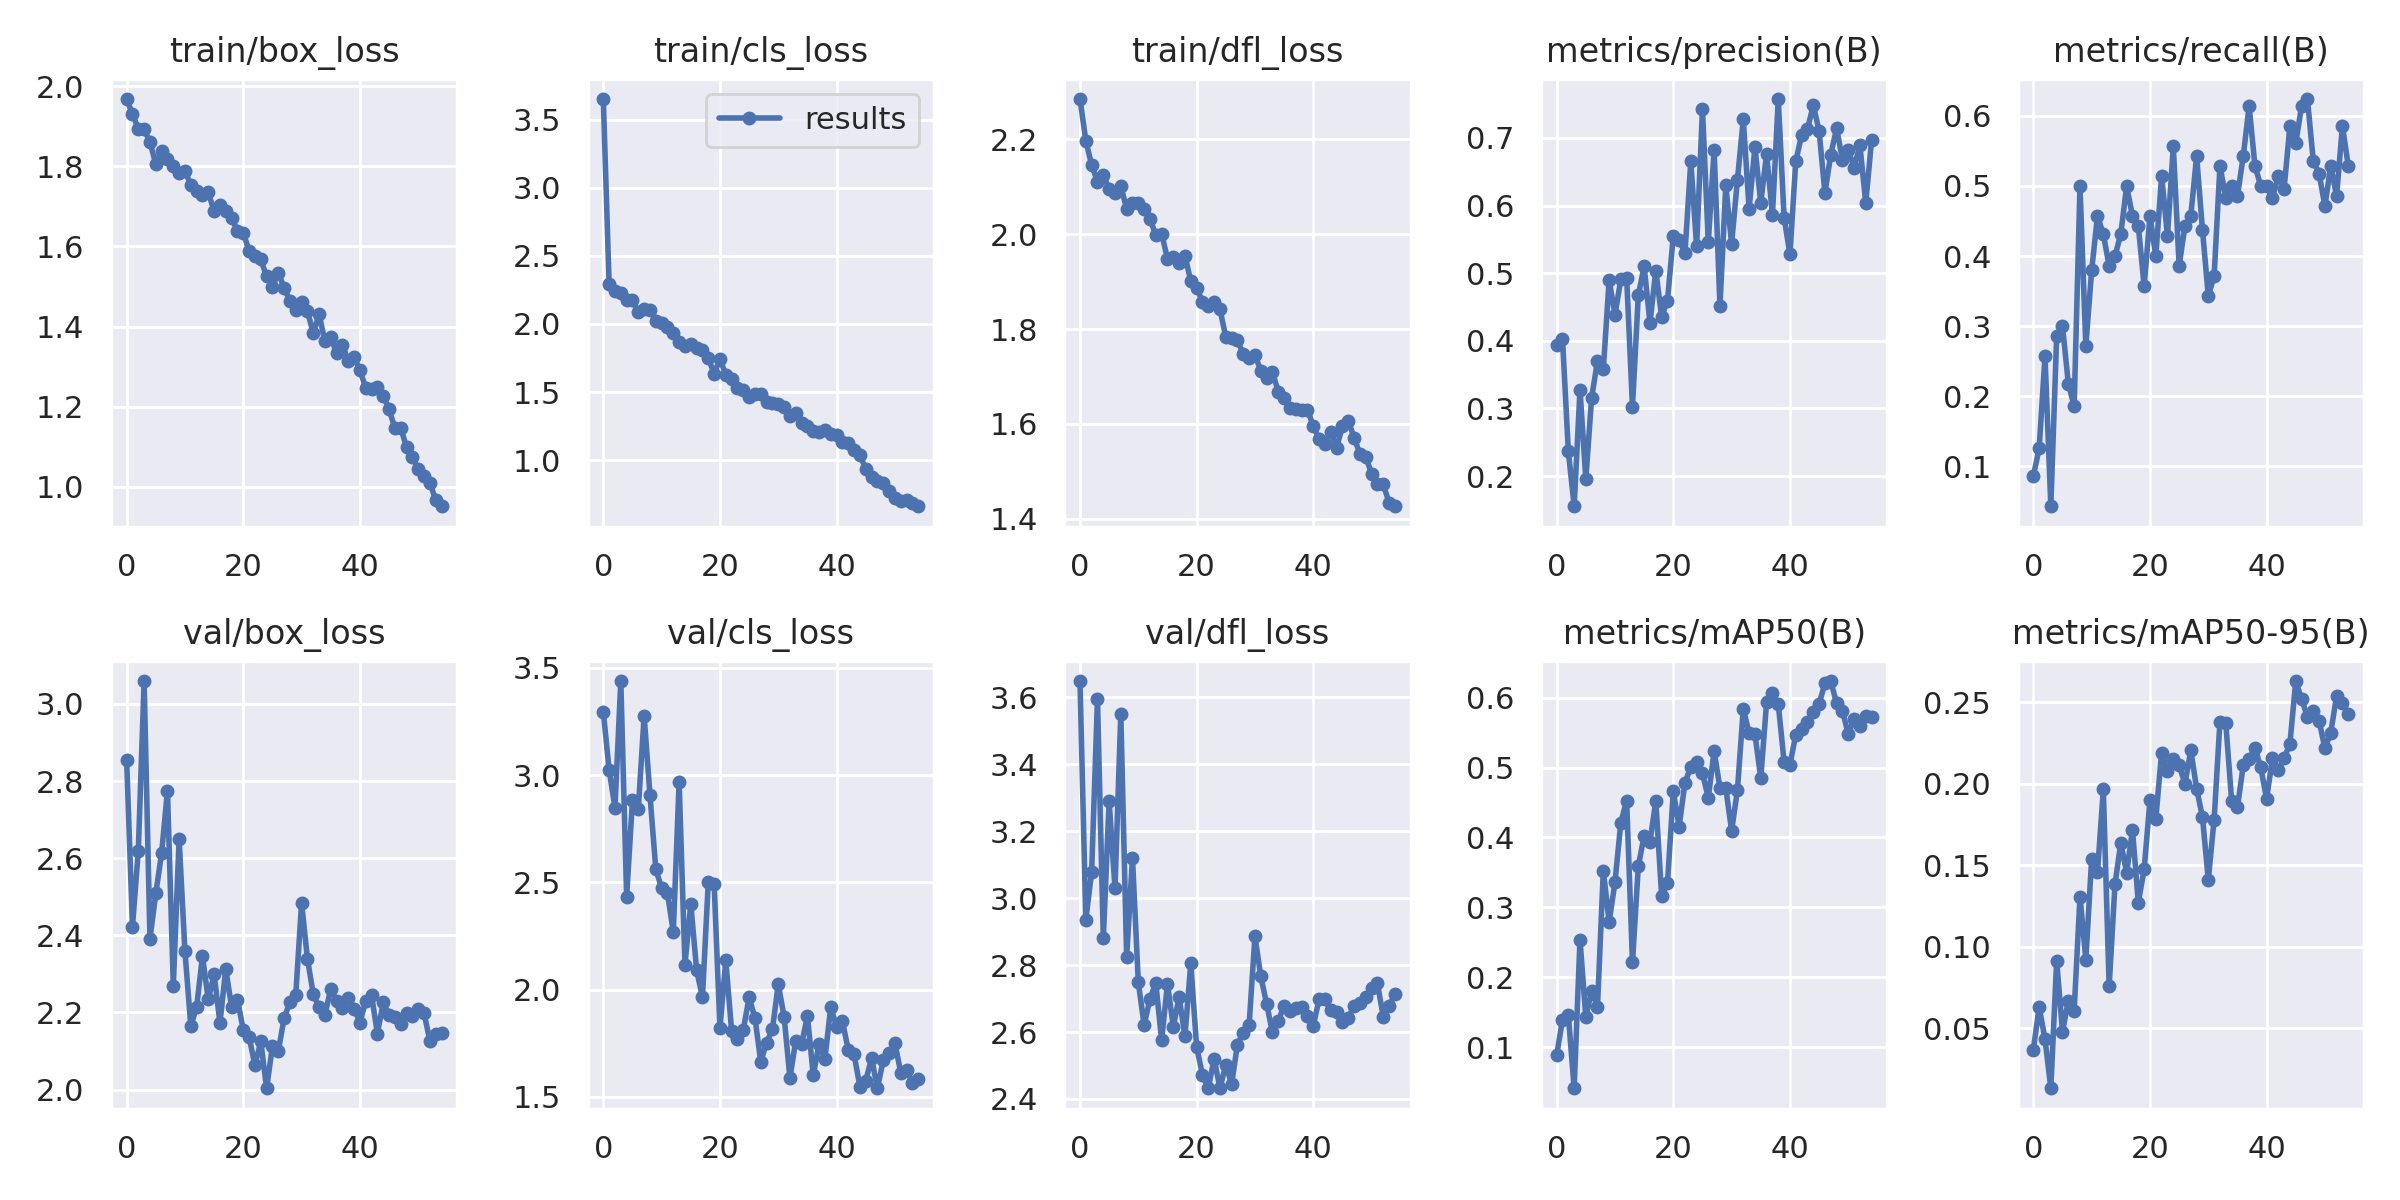

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


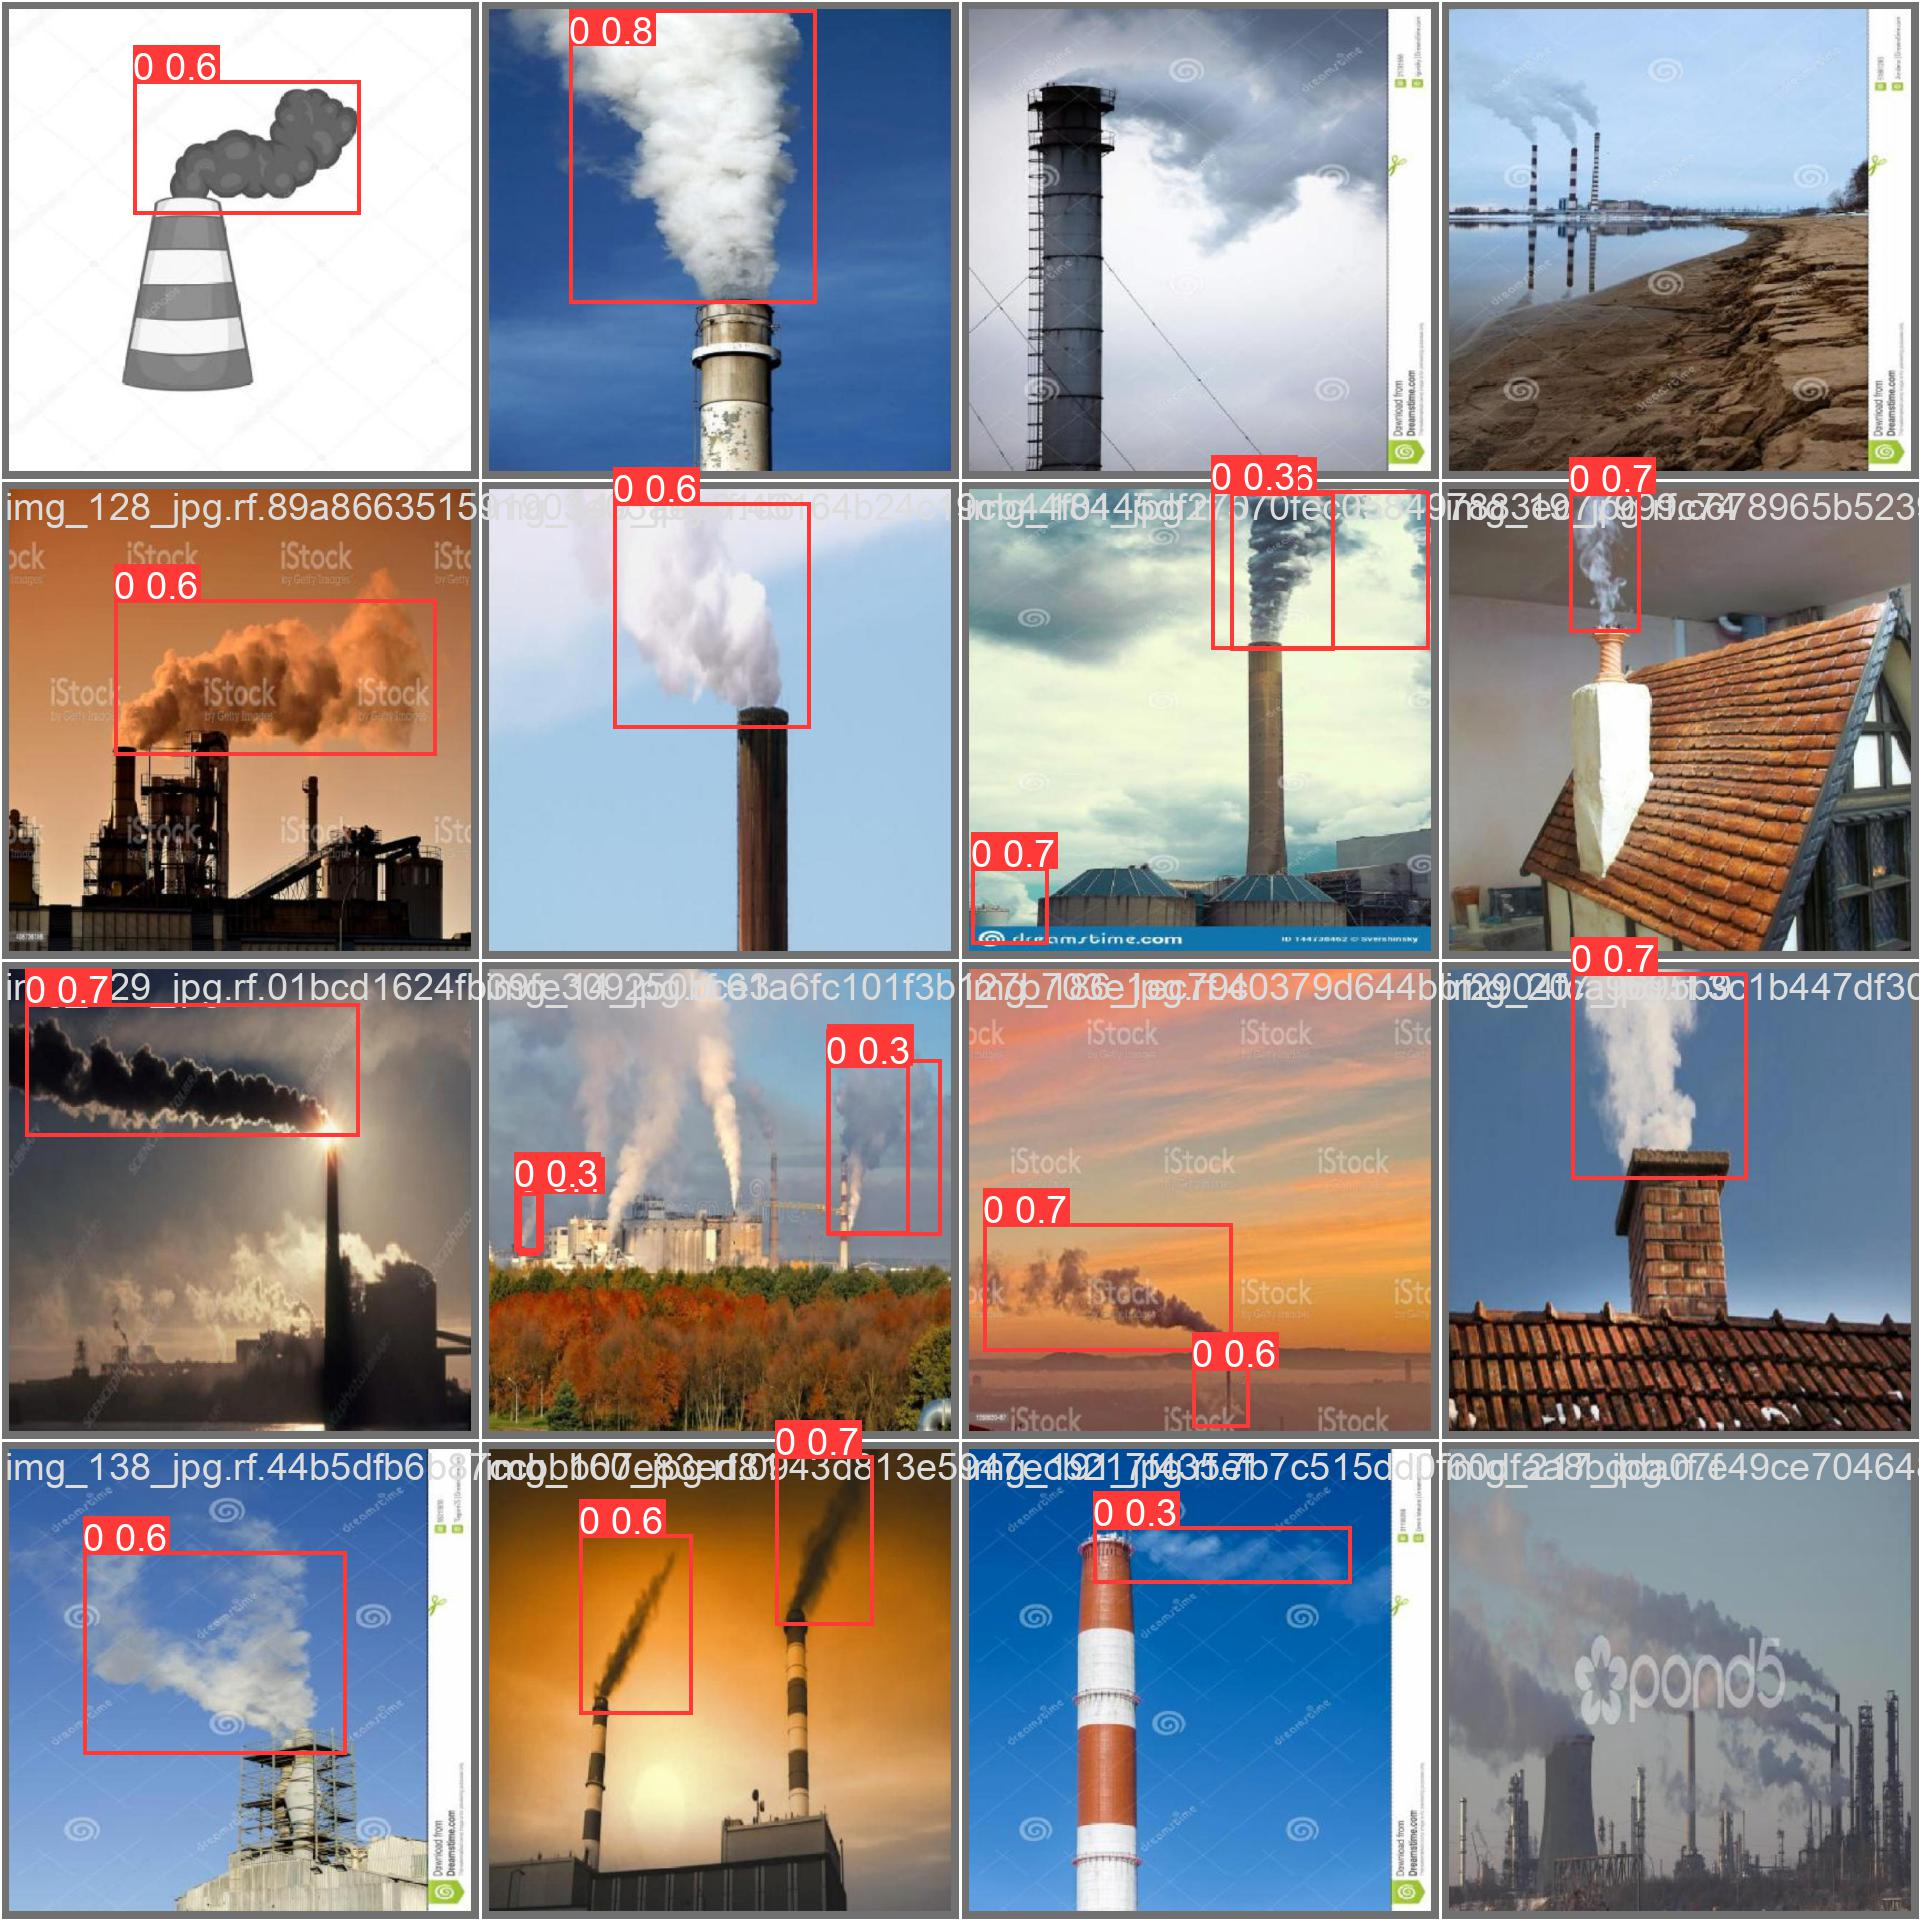

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-07-10 07:35:33.695650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 07:35:34.724118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/csir-7-1/valid/labels.cache... 53 images, 0 backgrounds, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.63s/it]
                   all         53         70      0.711      0.562      0.591      0.263
Speed: 23.2ms pre-process, 26.2ms inference, 0

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-10 07:35:56.393039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 07:35:57.316107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/36 /content/datasets/csir-7-1/test/images/img_112_jpg.rf.9ffde067540f70bad24df4b32af03c4d.jpg: 800x800 24.6ms
image 2/36 /content/datasets/csir-7-1/test/images/img_150_jpg.rf.e5877cfa19d76f0531e0d6db182e58b9.jpg: 800x800 24.7ms
image 3/36 /content/datasets/csir-7-1/test/images/img_161_jpg.rf.f5b96b43521181a0c7939186b8ed12ab.jpg: 800x800 3 0s, 24.6ms
image 4/36 /content/dataset

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="6syEHfL890JZVCu6qajU")
project = rf.workspace().project("csir-7")
model = project.version(1).model

# infer on a local image
print(model.predict("/content/red-white-smoke-chimneys-realistic-stack-pipes-vector-35730851.jpg", confidence=40, overlap=30).json())

# visualize your prediction
model.predict("/content/red-white-smoke-chimneys-realistic-stack-pipes-vector-35730851.jpg", confidence=40, overlap=30).save("prediction.jpg")

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 785, 'y': 271, 'width': 337, 'height': 271, 'confidence': 0.9327635765075684, 'class': '0', 'image_path': '/content/red-white-smoke-chimneys-realistic-stack-pipes-vector-35730851.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 330, 'y': 291, 'width': 560, 'height': 275, 'confidence': 0.7759244441986084, 'class': '0', 'image_path': '/content/red-white-smoke-chimneys-realistic-stack-pipes-vector-35730851.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '1000', 'height': '780'}}


In [ ]:
import cv2

In [ ]:
image=cv2.imread("/content/red-white-smoke-chimneys-realistic-stack-pipes-vector-35730851.jpg")

In [ ]:
image.shape

(780, 1000, 3)

In [ ]:
import json

In [ ]:
def image_katne_wala(model,image_path,confidence=40,overlap=30):
  image=cv2.imread(image_path)
  jason_wala_output = model.predict(image,confidence=confidence, overlap=overlap).json()


  # Extract the predictions
  predictions = jason_wala_output['predictions']
  bounding_boxes = [(pred['x'], pred['y'], pred['width'], pred['height']) for pred in predictions]
  for box in bounding_boxes:
    x =int(box[0])
    y = int(box[1])
    width =int(box[2])
    height =int(box[3])
    the_bounding_area = image[y-int(height/2):y+int(height/2), x-int(width/2):x+int(width/2),:]
    cv2_imshow(the_bounding_area)
    # Load the image in grayscale
    gray_image = cv2.cvtColor(the_bounding_area, cv2.COLOR_BGR2GRAY)

    # Calculate intensity statistics
    min_intensity = np.min(gray_image)
    max_intensity = np.max(gray_image)
    mean_intensity = np.mean(gray_image)
    std_intensity = np.std(gray_image)

    # Print the results
    print("Intensity Analysis:")
    print("Minimum Intensity:", min_intensity)
    print("Maximum Intensity:", max_intensity)
    print("Mean Intensity:", mean_intensity)

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

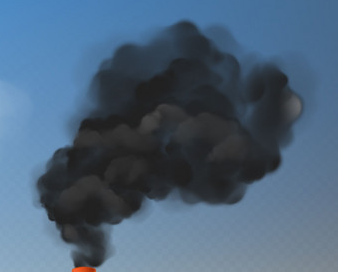

Intensity Analysis:
Minimum Intensity: 29
Maximum Intensity: 167
Mean Intensity: 93.82719500522103


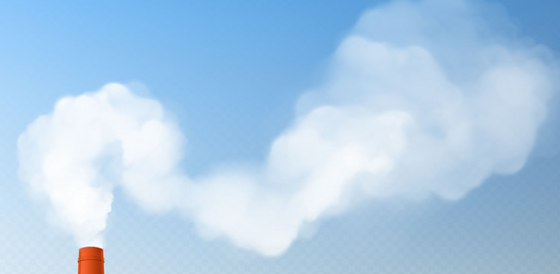

Intensity Analysis:
Minimum Intensity: 66
Maximum Intensity: 254
Mean Intensity: 198.62989442127216


In [ ]:
image_katne_wala(model,"/content/red-white-smoke-chimneys-realistic-stack-pipes-vector-35730851.jpg")

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the images with white smoke and black smoke
white_smoke_image = cv2.imread("/content/white smoke.png")
black_smoke_image = cv2.imread("/content/black smoke.png")

# Convert the images to grayscale
white_smoke_gray = cv2.cvtColor(white_smoke_image, cv2.COLOR_BGR2GRAY)
black_smoke_gray = cv2.cvtColor(black_smoke_image, cv2.COLOR_BGR2GRAY)

# Calculate the minimum and maximum intensity values
white_min_intensity = np.min(white_smoke_gray)
white_max_intensity = np.max(white_smoke_gray)
black_min_intensity = np.min(black_smoke_gray)
black_max_intensity = np.max(black_smoke_gray)

# Define the desired intensity range
new_min_intensity = 0
new_max_intensity = 255

# Scale the intensity values for the white smoke image
white_scaled_intensity = (white_smoke_gray - white_min_intensity) * (new_max_intensity - new_min_intensity) / \
                         (white_max_intensity - white_min_intensity) + new_min_intensity

# Scale the intensity values for the black smoke image
black_scaled_intensity = (black_smoke_gray - black_min_intensity) * (new_max_intensity - new_min_intensity) / \
                         (black_max_intensity - black_min_intensity) + new_min_intensity

# Convert the scaled intensities back to uint8 format
white_scaled_intensity = white_scaled_intensity.astype(np.uint8)
black_scaled_intensity = black_scaled_intensity.astype(np.uint8)

# Print the standardized intensity values
print("Standardized Intensity Values:")
print("White Smoke Image:")
print(white_scaled_intensity)
print()
print("Black Smoke Image:")
print(black_scaled_intensity)

In [ ]:
# Print the normalized intensities
print("Normalized Intensity Analysis:")
print("Minimum Intensity (Image 1):", normalized_min_intensity_1)
print("Maximum Intensity (Image 1):", normalized_max_intensity_1)
print("Mean Intensity (Image 1):", normalized_mean_intensity_1)
print()
print("Minimum Intensity (Image 2):", normalized_min_intensity_2)
print("Maximum Intensity (Image 2):", normalized_max_intensity_2)
print("Mean Intensity (Image 2):", normalized_mean_intensity_2)

Normalized Intensity Analysis:
Minimum Intensity (Image 1): 0.0
Maximum Intensity (Image 1): 1.0
Mean Intensity (Image 1): 0.4697622826465292

Minimum Intensity (Image 2): 0.0
Maximum Intensity (Image 2): 1.0
Mean Intensity (Image 2): 0.7054781618152774


In [ ]:
import cv2
import numpy as np

In [ ]:
# Load the bounding box image
bounding_box_image = cv2.imread("/content/white smoke.png")
# Convert the image to grayscale
gray_image = cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2GRAY)

# Find the coordinates of the pixel with maximum intensity
max_intensity_coord = np.unravel_index(np.argmax(gray_image), gray_image.shape)


In [ ]:
# Print the coordinates of the pixel with maximum intensity
print("Coordinates of the pixel with maximum intensity:")
print("Row:", max_intensity_coord[0])
print("Column:", max_intensity_coord[1])

Coordinates of the pixel with maximum intensity:
Row: 189
Column: 72


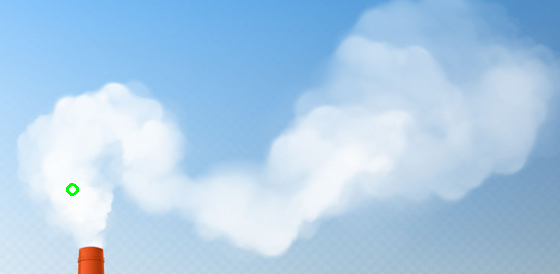

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread("/content/white smoke.png")

# Load the bounding box image
bounding_box_image = cv2.imread("/content/white smoke.png")

# Convert the bounding box image to grayscale
gray_image = cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2GRAY)

# Find the coordinates of the pixel with maximum intensity
max_intensity_coord = np.unravel_index(np.argmax(gray_image), gray_image.shape)

# Draw a circle or marker at the maximum intensity coordinate on the original image
radius = 5  # Adjust the radius of the circle or marker as needed
color = (0, 255, 0)  # Adjust the color as needed, here it's green
thickness = 2  # Adjust the thickness as needed

# Draw a circle at the maximum intensity coordinate
cv2.circle(original_image, (max_intensity_coord[1], max_intensity_coord[0]), radius, color, thickness)

# Display the original image with the highlighted maximum intensity coordinate
cv2_imshow(original_image)
